# Monetary Aggregates

In [471]:
#Libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from pandas.io.json import json_normalize
import pickle
import os 
import sys

In [472]:
#Number of daily simulations
steps=100
BlockPerDay=6570 #blocks per day
BlocksPerYear=BlockPerDay*365
BlockRate=BlocksPerYear

In [473]:
BlockRate
n = 1000000
percentage = 1
Delta= 2*60*24

In [474]:
#Initialize Variables Market Volatile
X1=np.zeros(steps) #Exchange Rate
X1[0]=1/49.8906263347343
IAs1=np.zeros(steps)  #Interest accumulated supply
IAs1[0]=0 #
TS1=np.zeros(steps)  #Total Supply
TS1[0]=percentage*n/2500 # 1326781 #Total ETH
TB1=np.zeros(steps)  #Total Borrows ETH
TB1[0]=percentage*67190*(n/2500)/1326781 # 67190 #Total Borrows ETH
IAb1=np.zeros(steps)  #Interest accumulated borrow
IAb1[0]=0 #
TR1=np.zeros(steps) #Total Reserves
TR1[0]=percentage*326*(n/2500)/1326781 # 326 #Total Reserves ETH
rateB1=np.zeros(steps) #Block Rate
rateB1[0]=0 #
rateS1=np.zeros(steps) #Block Rate
rateS1[0]=0 #

In [475]:
#Initialize Variables Market Stable 1
X2=np.zeros(steps) #Exchange Rate
X2[0]=1/45.3677485000342
IAs2=np.zeros(steps)  #Interest accumulated supply
IAs2[0]=0 #
TS2=np.zeros(steps)  #Total Supply
TS2[0]=3615296781*(n/2500)/1326781 # 3615296781 #Total 
TB2=np.zeros(steps)  #Total Borrows 
TB2[0]=2200559758*(n/2500)/1326781  # 2200559758 #Total Borrows 
IAb2=np.zeros(steps)  #Interest accumulated borrow
IAb2[0]=0 #
TR2=np.zeros(steps) #Total Reserves
TR2[0]= 6199487*(n/2500)/1326781 # 6199487 #Total Reserves 
rateB2=np.zeros(steps) #Block Rate
rateB2[0]=0 #
rateS2=np.zeros(steps) #Block Rate
rateS2[0]=0 #

In [476]:
#Initialize Variables Market Stable 2
X3=np.zeros(steps) #Exchange Rate
X3[0]=1/46.5881718870464
IAs3=np.zeros(steps)  #Interest accumulated supply
IAs3[0]=0 #
TS3=np.zeros(steps)  #Total Supply
TS3[0]=3424342312*(n/2500)/1326781 # 3424342312 #Total 
TB3=np.zeros(steps)  #Total Borrows 
TB3[0]=2552616954*(n/2500)/1326781 # 2552616954 #Total Borrows 
IAb3=np.zeros(steps)  #Interest accumulated borrow
IAb3[0]=0 #
TR3=np.zeros(steps) #Total Reserves
TR3[0]=12980202*(n/2500)/1326781 # 12980202 #Total Reserves 
rateB3=np.zeros(steps) #Block Rate
rateB3[0]=0 #
rateS3=np.zeros(steps) #Block Rate
rateS3[0]=0 #

In [477]:
#Initialize Variables Market Stable 3
X4=np.zeros(steps) #Exchange Rate
X4[0]=1/45.9779601935403
IAs4=np.zeros(steps)  #Interest accumulated supply
IAs4[0]=0 #
TS4=np.zeros(steps)  #Total Supply
TS4[0]=3519819547*(n/2500)/1326781 # 3519819547 #Total 
TB4=np.zeros(steps)  #Total Borrows 
TB4[0]=2376588356*(n/2500)/1326781 # 2376588356 #Total Borrows 
IAb4=np.zeros(steps)  #Interest accumulated borrow
IAb4[0]=0 #
TR4=np.zeros(steps) #Total Reserves
TR4[0]=9589845*(n/2500)/1326781 # 9589845 #Total Reserves 
rateB4=np.zeros(steps) #Block Rate
rateB4[0]=0 #
rateS4=np.zeros(steps) #Block Rate
rateS4[0]=0 #

In [478]:
#Initial parameters and interest rate model
#I=np.array([1]) #Index
rF1=0.2
rF2=0.07
rF3=0.15
rF4=0.07

In [479]:
#Utilization
def urate(S,B):
    if S>0:
        ur=B/S
    else:
        ur=0  
    return ur

In [480]:
Ut1=np.zeros(steps) #Utilization Rate
Ut1[0]=TB1[0]/TS1[0]
Ut2=np.zeros(steps) #Utilization Rate
Ut2[0]=TB2[0]/TS2[0]
Ut3=np.zeros(steps) #Utilization Rate
Ut3[0]=TB3[0]/TS3[0]
Ut4=np.zeros(steps) #Utilization Rate
Ut4[0]=TB4[0]/TS4[0]

In [481]:
print('Utilization rate volatile',Ut1[0])
print('Utilization rate stable1',Ut2[0])
print('Utilization rate stable2',Ut3[0])
print('Utilization rate stable3',Ut4[0])

Utilization rate volatile 0.05064136432463233
Utilization rate stable1 0.6086802526323495
Utilization rate stable2 0.7454327638492235
Utilization rate stable3 0.6752017608475427


## Interest Rate model Stable

In [482]:
#Functions interest rate model
def br2(u):
    if u<=0.85:
        rt=0.08+0.018*u
    else:
        rt=0.08+0.018*0.85+0.8*(u-0.85)
    return rt
def sr2(u):
    return u*br2(u)*(1-rF2)

In [483]:
#Functions interest rate model
def br3(u):
    if u<=0.8:
        rt=0.1+0.015*u
    else:
        rt=0.01+0.015*0.8+1*(u-0.8)
    return rt
def sr3(u):
    return u*br3(u)*(1-rF3)

In [484]:
#Functions interest rate model
def br4(u):
    if u<=0.8:
        rt=0.1+0.015*u
    else:
        rt=0.01+0.015*0.8+1*(u-0.8)
    return rt
def sr4(u):
    return u*br4(u)*(1-rF4)

In [485]:
Br2=np.zeros(steps) #Borrow Rate
Br2[0]=br2(TB2[0]/TS2[0])
Sr2=np.zeros(steps) #Supply Rate
Sr2[0]=sr2(TB2[0]/TS2[0])
Br3=np.zeros(steps) #Borrow Rate
Br3[0]=br3(TB3[0]/TS3[0])
Sr3=np.zeros(steps) #Supply Rate
Sr3[0]=sr3(TB3[0]/TS3[0])
Br4=np.zeros(steps) #Borrow Rate
Br4[0]=br4(TB4[0]/TS4[0])
Sr4=np.zeros(steps) #Supply Rate
Sr4[0]=sr4(TB4[0]/TS4[0])

In [486]:
print('Borrow Rate stable 1',Br2[0])
print('Supply Rate stable 1',Sr2[0])
print('Borrow Rate stable 2',Br3[0])
print('Supply Rate stable 2',Sr3[0])
print('Borrow Rate stable 3',Br4[0])
print('Supply Rate stable 3',Sr4[0])

Borrow Rate stable 1 0.0909562445473823
Supply Rate stable 1 0.051487841015919085
Borrow Rate stable 2 0.11118149145773835
Supply Rate stable 2 0.07044657749628762
Borrow Rate stable 3 0.11012802641271315
Supply Rate stable 3 0.0691535327378516


## Interest Rate volatile linear model target 5%

In [487]:
#Functions interest rate model
def br1(u):
    return 0.08+0.04*u
def sr1(u):
    return 0.04+0.02*u

In [488]:
Br1=np.zeros(steps) #Borrow Rate
Br1[0]=br1(TB1[0]/TS1[0])
Sr1=np.zeros(steps) #Supply Rate
Sr1[0]=sr1(TB1[0]/TS1[0])

In [489]:
print('Borrow Rate volatile',Br1[0])
print('Supply Rate volatile',Sr1[0])

Borrow Rate volatile 0.0820256545729853
Supply Rate volatile 0.04101282728649265


## Simulate Aggregates

In [490]:
1012.8272864926465*10000000/(1326781*2500)

3.053487460229372

In [491]:
#Simulate 1st steps
def sim_agg(T):
    #Market 1 volatile
    # Nio1=np.random.uniform(low=-500, high=50, size=T)# borrows ETH
    Nio1=np.random.uniform(low=-500*(n/2500)/1326781, high=50*(n/2500)/1326781, size=T) 
    # Mio1=np.random.uniform(low=-2000, high=2500, size=T) #supply ETH
    Mio1=np.random.uniform(low=-2000*(n/2500)/1326781, high=2500*(n/2500)/1326781, size=T)
    #Market 2 stablecoin 1
    # Nio2=np.random.uniform(low=-7000000, high=850000, size=T)# borrows ETH
    Nio2=np.random.uniform(low=-7000000*(n/2500)/1326781, high=850000*(n/2500)/1326781, size=T)
    # Mio2=np.random.uniform(low=-7000000, high=1000000, size=T) #supply ETH
    Mio2=np.random.uniform(low=-7000000*(n/2500)/1326781, high=1000000*(n/2500)/1326781, size=T)
    #Market 3 stablecoin 2
    # Nio3=np.random.uniform(low=-4000000, high=2500000, size=T)# borrows ETH
    Nio3=np.random.uniform(low=-4000000*(n/2500)/1326781, high=2500000*(n/2500)/1326781, size=T)
    # Mio3=np.random.uniform(low=-4000000, high=7000000, size=T) #supply ETH
    Mio3=np.random.uniform(low=-4000000*(n/2500)/1326781, high=7000000*(n/2500)/1326781, size=T)
    #Market 4 stablecoin 3
    # Nio4=np.random.uniform(low=-4000000, high=2500000, size=T)# borrows ETH
    Nio4=np.random.uniform(low=-4000000*(n/2500)/1326781, high=2500000*(n/2500)/1326781, size=T)
    # Mio4=np.random.uniform(low=-4000000, high=4000000, size=T) #supply ETH
    Mio4=np.random.uniform(low=-4000000*(n/2500)/1326781, high=7000000*(n/2500)/1326781, size=T)
    for t in range(1, T):
        #Interest rate model 1
        Ut1[t]=urate(TS1[t-1],TB1[t-1])  
        Br1[t]=br1(Ut1[t])
        Sr1[t]=sr1(Ut1[t])
        rateB1[t]=Br1[t]/BlockRate
        rateS1[t]=Sr1[t]/BlockRate
        IAb1[t]=IAb1[t-1]+TB1[t-1]*rateB1[t]*Delta
        TB1[t]=TB1[t-1]+IAb1[t]+Nio1[t]
        TR1[t]=TR1[t-1]+TB1[t-1]*rateB1[t]*Delta*rF1
        IAs1[t]=IAs1[t-1]+TS1[t-1]*rateS1[t]*Delta
        TS1[t]=TS1[t-1]+IAs1[t]+Mio1[t]
        #Interest rate model 2
        Ut2[t]=urate(TS2[t-1],TB2[t-1])  
        Br2[t]=br2(Ut2[t])
        Sr2[t]=sr2(Ut2[t])
        rateB2[t]=Br2[t]/BlockRate
        rateS2[t]=Sr2[t]/BlockRate
        IAb2[t]=IAb2[t-1]+TB2[t-1]*rateB2[t]*Delta
        TB2[t]=TB2[t-1]+IAb2[t]+Nio2[t]
        TR2[t]=TR2[t-1]+TB2[t-1]*rateB2[t]*Delta*rF2
        IAs2[t]=IAs2[t-1]+TS2[t-1]*rateS2[t]*Delta
        TS2[t]=TS2[t-1]+IAs2[t]+Mio2[t]
        #Interest rate model 3
        Ut3[t]=urate(TS3[t-1],TB3[t-1])  
        Br3[t]=br3(Ut3[t])
        Sr3[t]=sr3(Ut3[t])
        rateB3[t]=Br3[t]/BlockRate
        rateS3[t]=Sr3[t]/BlockRate
        IAb3[t]=IAb3[t-1]+TB3[t-1]*rateB3[t]*Delta # - n*(1-percentage)
        TB3[t]=TB3[t-1]+IAb3[t]+Nio3[t]
        TR3[t]=TR3[t-1]+TB3[t-1]*rateB3[t]*Delta*rF3
        IAs3[t]=IAs3[t-1]+TS3[t-1]*rateS3[t]*Delta
        TS3[t]=TS3[t-1]+IAs3[t]+Mio3[t]
        #Interest rate model 4
        Ut4[t]=urate(TS4[t-1],TB4[t-1])  
        Br4[t]=br4(Ut4[t])
        Sr4[t]=sr4(Ut4[t])
        rateB4[t]=Br4[t]/BlockRate
        rateS4[t]=Sr4[t]/BlockRate
        IAb4[t]=IAb4[t-1]+TB4[t-1]*rateB4[t]*Delta # - n*(1-percentage)
        TB4[t]=TB4[t-1]+IAb4[t]+Nio4[t]
        TR4[t]=TR4[t-1]+TB4[t-1]*rateB4[t]*Delta*rF4
        IAs4[t]=IAs4[t-1]+TS4[t-1]*rateS4[t]*Delta
        TS4[t]=TS4[t-1]+IAs4[t]+Mio4[t]
    itm1=pd.DataFrame({'utilization':Ut1,'borrow rate':Br1,'Block brate':rateB1,'supply rate': Sr1,'Block srate': rateS1})
    itm2=pd.DataFrame({'utilization':Ut2,'borrow rate':Br2,'Block brate':rateB2,'supply rate': Sr2,'Block srate': rateS2})
    itm3=pd.DataFrame({'utilization':Ut3,'borrow rate':Br3,'Block brate':rateB3,'supply rate': Sr3,'Block srate': rateS3})
    itm4=pd.DataFrame({'utilization':Ut4,'borrow rate':Br4,'Block brate':rateB4,'supply rate': Sr4,'Block srate': rateS4})
    mAgg1=pd.DataFrame({'N.Borrow(ETH)':Nio1,'T.Borrow(ETH)':TB1,'IA.Borrow(ETH)':IAb1,'N.Supply(ETH)':Mio1,'T.Supply(ETH)':TS1,'IA.Supply(ETH)':IAs1,'T.Reserves(ETH)': TR1,'Cash(ETH)':(TS1-TB1+TR1)})
    mAgg2=pd.DataFrame({'N.Borrow(USD)':Nio2,'T.Borrow(USD)':TB2,'IA.Borrow(USD)':IAb2,'N.Supply(USD)':Mio2,'T.Supply(USD)':TS2,'IA.Supply(USD)':IAs2,'T.Reserves(USD)': TR2,'Cash(USD)':(TS2-TB2+TR2)})
    mAgg3=pd.DataFrame({'N.Borrow(USD)':Nio3,'T.Borrow(USD)':TB3,'IA.Borrow(USD)':IAb3,'N.Supply(USD)':Mio3,'T.Supply(USD)':TS3,'IA.Supply(USD)':IAs3,'T.Reserves(USD)': TR3,'Cash(USD)':(TS3-TB3+TR3)})
    mAgg4=pd.DataFrame({'N.Borrow(USD)':Nio4,'T.Borrow(USD)':TB4,'IA.Borrow(USD)':IAb4,'N.Supply(USD)':Mio4,'T.Supply(USD)':TS4,'IA.Supply(USD)':IAs4,'T.Reserves(USD)': TR4,'Cash(USD)':(TS4-TB4+TR4)})
    return itm1,mAgg1,itm2,mAgg2,itm3,mAgg3,itm4,mAgg4

In [492]:
(itm1,mAgg1,itm2,mAgg2,itm3,mAgg3,itm4,mAgg4)=sim_agg(steps)

In [493]:
pd.set_option("display.precision", 10)
itm1.tail()

,utilization,borrow rate,Block brate,supply rate,Block srate
95,0.0452024835,0.0818080993,0.0000000341,0.0409040497,0.0000000171
96,0.0452068954,0.0818082758,0.0000000341,0.0409041379,0.0000000171
97,0.0453322013,0.0818132881,0.0000000341,0.0409066440,0.0000000171
98,0.0454211256,0.0818168450,0.0000000341,0.0409084225,0.0000000171
99,0.0453675067,0.0818147003,0.0000000341,0.0409073501,0.0000000171


In [494]:
pd.set_option("display.precision", 10)
itm2.tail()

,utilization,borrow rate,Block brate,supply rate,Block srate
95,0.6998323896,0.0925969830,0.0000000386,0.0602662021,0.0000000251
96,0.7016288546,0.0926293194,0.0000000386,0.0604420050,0.0000000252
97,0.7026475968,0.0926476567,0.0000000386,0.0605417476,0.0000000252
98,0.7036517916,0.0926657322,0.0000000386,0.0606400999,0.0000000253
99,0.7067990894,0.0927223836,0.0000000387,0.0609485696,0.0000000254


In [495]:
pd.set_option("display.precision", 10)
itm3.tail()

,utilization,borrow rate,Block brate,supply rate,Block srate
95,0.8324581211,0.0544581211,0.0000000227,0.0385339894,0.0000000161
96,0.8346813312,0.0566813312,0.0000000236,0.0402142216,0.0000000168
97,0.8367058236,0.0587058236,0.0000000245,0.0417515788,0.0000000174
98,0.8389069444,0.0609069444,0.0000000254,0.0434309698,0.0000000181
99,0.8410948786,0.0630948786,0.0000000263,0.0451084624,0.0000000188


In [496]:
pd.set_option("display.precision", 10)
mAgg1.tail()

,N.Borrow(ETH),T.Borrow(ETH),IA.Borrow(ETH),N.Supply(ETH),T.Supply(ETH),IA.Supply(ETH),T.Reserves(ETH),Cash(ETH)
95,-0.0672521393,22.8135256320,0.1870013012,0.5682321557,504.6470329521,2.0316845547,0.1356832474,481.9691905675
96,-0.0580785825,22.9446897741,0.1892427246,-0.5580066836,506.1455015479,2.0564752794,0.1361315321,483.3369433059
97,-0.0220240422,23.1141629048,0.1914971729,0.6588927922,508.8857354796,2.0813411395,0.1365824218,485.9081549966
98,-0.1007232802,23.2072079963,0.1937683717,0.5460180986,511.5380962867,2.1063427085,0.1370366615,488.4679249520
99,-0.0170494008,23.3862072489,0.1960486534,-0.4070217875,513.2625484285,2.1314739292,0.1374927178,490.0138338974


In [497]:
pd.set_option("display.precision", 10)
mAgg2.tail()

,N.Borrow(USD),T.Borrow(USD),IA.Borrow(USD),N.Supply(USD),T.Supply(USD),IA.Supply(USD),T.Reserves(USD),Cash(USD)
95,-1747.8460750660,920482.4043964448,7620.8180101290,-2063.0864694734,1.3119221058e+06,7087.3607494200,2402.4882462296,393842.1896569561
96,-1804.1470602248,926401.4749363633,7723.2176001432,-660.7454138757,1.3184439528e+06,7182.5923681332,2409.6562175306,394452.1340425960
97,-1343.5140355048,932884.2569632792,7826.2960624207,53.0224598790,1.3257754306e+06,7278.4553380512,2416.8717098900,395308.0453059698
98,15.9853202852,940830.3583830950,7930.1160995306,-2036.1621521889,1.3311142764e+06,7375.0079725634,2424.1391124877,392708.0571091263
99,-1864.6229640438,947000.6198829585,8034.8844639073,-953.2792643336,1.3376334397e+06,7472.4425514338,2431.4728979941,393064.2926818694


In [498]:
pd.set_option("display.precision", 10)
mAgg3.tail()

,N.Borrow(USD),T.Borrow(USD),IA.Borrow(USD),N.Supply(USD),T.Supply(USD),IA.Supply(USD),T.Reserves(USD),Cash(USD)
95,83.0556056941,1.2421392278e+06,9755.9016935799,-447.7189813487,1.4881598298e+06,8292.5164395429,5376.6767467551,251397.2787673894
96,540.4922665527,1.2525201778e+06,9840.4577213225,441.7905212930,1.4969660094e+06,8364.3890631241,5389.3601509165,249835.1917680925
97,-548.0633568508,1.2619008802e+06,9928.7657459171,-1185.1309309384,1.5042203294e+06,8439.4508840295,5402.6063546057,247722.0555358066
98,-247.4415266977,1.2716745096e+06,10021.0709759858,-810.7010526473,1.5119275386e+06,8517.9103295880,5416.4521391160,245669.4811479695
99,-155.8108295431,1.2816361315e+06,10117.4326484777,252.0943371776,1.5207794507e+06,8599.8177512061,5430.9063899897,244574.2256682923


## Ingresos y Gastos en Intereses en los mercados

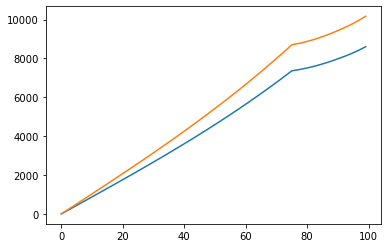

In [499]:
TBwithEfects = []
for i in TB3:
    TBwithEfects.append(i-n*(1-percentage)*0.75)
    
IAbwithEfects = [IAb3[0]]
for i in range(1,len(TBwithEfects)):
    IAbwithEfects.append(IAbwithEfects[i-1] + TBwithEfects[i]*rateB3[i]*Delta)

    
plt.plot(IAs3)
plt.plot(IAbwithEfects)

In [500]:
#Mercado 1 ETH
pETHusd=2500
Ingm1=mAgg1.loc[steps-1,'IA.Borrow(ETH)']*pETHusd
Gstm1=mAgg1.loc[steps-1,'IA.Supply(ETH)']*pETHusd
Margenm1=Ingm1-Gstm1

In [501]:
#Mercado 2 Stable
Ingm2=mAgg2.loc[steps-1,'IA.Borrow(USD)']
Gstm2=mAgg2.loc[steps-1,'IA.Supply(USD)']
Margenm2=Ingm2-Gstm2

In [502]:
#Mercado 3 Stable
Ingm3=mAgg3.loc[steps-1,'IA.Borrow(USD)']
Gstm3=mAgg3.loc[steps-1,'IA.Supply(USD)']
Margenm3=Ingm3-Gstm3

In [503]:
#Mercado 4 Stable
Ingm4=mAgg4.loc[steps-1,'IA.Borrow(USD)']
Gstm4=mAgg4.loc[steps-1,'IA.Supply(USD)']
Margenm4=Ingm4-Gstm4

In [504]:
print('Margen Mercado Volatil 1 (USD)',Margenm1)
print('Margen Mercado Stable 1 (USD)',Margenm2)
print('Margen Mercado Stable 2 (USD)',Margenm3)
print('Margen Mercado Stable 3 (USD)',Margenm4)

Margen Mercado Volatil 1 (USD) -4838.563189644799
Margen Mercado Stable 1 (USD) 562.4419124735141
Margen Mercado Stable 2 (USD) 1517.6148972716583
Margen Mercado Stable 3 (USD) 798.9923685851772


In [505]:
Margenm1 + Margenm2 + Margenm3 + Margenm4

-1959.5140113144498

In [506]:
27773.98013256317/40000000

0.0006943495033140792

In [507]:
-(Margenm1 + Margenm2 + Margenm3 + Margenm4)/(TS1[0]*2500+TS2[0]+TS3[0]+TS4[0])

0.00046839307606552313

In [508]:
print("Volumen del mercado volatil en el momento inicial (USD)",TS1[0]*2500)
print("Volumen del mercado estable1 en el momento inicial (USD)",TS2[0])
print("Volumen del mercado estable2 en el momento inicial (USD)",TS3[0])
print("Volumen del mercado estable3 en el momento inicial (USD)",TS4[0])

print("Luego de 100 iteraciones:")

print('Margen Mercado volatil (USD)',Margenm1)
print('Margen Mercado estable1 (USD)',Margenm2)
print('Margen Mercado estable2 (USD)',Margenm3)
print('Margen Mercado estable3 (USD)',Margenm4)

print("Margen neto entre mercados (USD)",Margenm1+Margenm2+Margenm3+Margenm4)

Volumen del mercado volatil en el momento inicial (USD) 1000000.0
Volumen del mercado estable1 en el momento inicial (USD) 1089945.2979806012
Volumen del mercado estable2 en el momento inicial (USD) 1032376.0475918783
Volumen del mercado estable3 en el momento inicial (USD) 1061160.6729369806
Luego de 100 iteraciones:
Margen Mercado volatil (USD) -4838.563189644799
Margen Mercado estable1 (USD) 562.4419124735141
Margen Mercado estable2 (USD) 1517.6148972716583
Margen Mercado estable3 (USD) 798.9923685851772
Margen neto entre mercados (USD) -1959.5140113144498


In [509]:
TS1inUSD = []
for i in TS1:
    TS1inUSD.append(i*2500)
    
netMar0 = []; netMar1 = []; netMar2 = []
for i in range(len(TS1inUSD)):
    netMar0.append((mAgg1.loc[i,'IA.Borrow(ETH)'] - mAgg1.loc[i,'IA.Supply(ETH)'])*pETHusd)
    netMar1.append(mAgg2.loc[i,'IA.Borrow(USD)'] - mAgg2.loc[i,'IA.Supply(USD)'])
    netMar2.append(mAgg3.loc[i,'IA.Borrow(USD)'] - mAgg3.loc[i,'IA.Supply(USD)'])

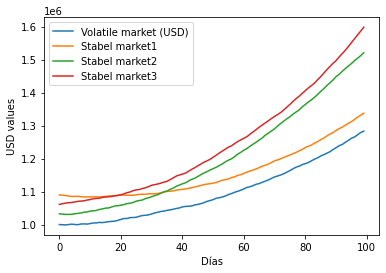

In [510]:
plt.plot(TS1inUSD,label="Volatile market (USD)")
plt.plot(TS2,label="Stabel market1")
plt.plot(TS3,label="Stabel market2")
plt.plot(TS4,label="Stabel market3")
plt.xlabel("Días"); plt.ylabel("USD values")
plt.legend()
plt.show()